# PCB Defect Detection using YOLOv5

Author: Dimitri Vavoulis

## Project Overview
This project presents an automated system for detecting defects in Printed Circuit Boards (PCBs) using computer vision and deep learning techniques. The core of the system is a custom-trained YOLOv5 model, designed to identify and localize various types of PCB defects with high accuracy and speed.

The workflow encompasses:

1. Data Preparation: Utilizing a specialized PCB defect dataset, processed and augmented using Roboflow.
2. Model Training: Fine-tuning a YOLOv5 model on the prepared dataset to recognize specific PCB defects.
3. Inference: Applying the trained model to detect defects in both static images and video streams.
4. Analysis: Generating statistical insights and visualizations of the detected defects.
5. Real-time Processing: Implementing a video processing pipeline for continuous defect detection.

This system is designed to enhance quality control processes in PCB manufacturing, offering a scalable solution that can be integrated into existing production lines for real-time defect identification and analysis.

## Key Features
- Custom YOLOv5 model training on a PCB defect dataset
- Real-time defect detection in images and video streams
- Data visualization and statistical analysis of defect patterns
- Scalable solution adaptable to various manufacturing environments

## Technologies Used
- Python
- PyTorch
- OpenCV
- YOLOv5
- Matplotlib
- Roboflow (for dataset management)

## Potential Industrial Applications
- Automated quality control in PCB manufacturing
- Real-time defect detection in production lines
- Predictive maintenance in electronics manufacturing
- Enhancing efficiency and reducing errors in manual inspection processes

## Technical Highlights
- Deep Learning model training and optimization
- Computer Vision techniques for defect identification
- Data Analysis and Visualization of detection results
- Integration of multiple Python libraries for a comprehensive solution
- Scalable architecture suitable for industrial deployment



#1. Set up the environment and import necessary libraries

In [4]:
!pip install roboflow ultralytics opencv-python matplotlib

import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from roboflow import Roboflow
from IPython.display import Image

#2. Download and prepare the dataset

In [6]:
rf = Roboflow(api_key="BrhdGjN5jaRIzLJyova1")
project = rf.workspace("placement-2023-9jdtv").project("placement-pcb-defects")
dataset = project.version(2).download("yolov5")

print("Dataset downloaded to:", dataset)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Placement-pcb-defects-2 in yolov5pytorch:: 100%|██████████| 152/152 [00:00<00:00, 4714.69it/s]

Dataset downloaded to: <roboflow.core.dataset.Dataset object at 0x7a03153cab90>


#3. Verify the dataset location

In [8]:
data_yaml_path = "/content/Placement-pcb-defects-2/data.yaml"

if os.path.exists(data_yaml_path):
    print(f"data.yaml found at {data_yaml_path}")
else:
    print(f"data.yaml not found at {data_yaml_path}")
    print("Contents of /content/placement-pcb-defects-2:", os.listdir("/content/placement-pcb-defects-2"))

data.yaml found at /content/Placement-pcb-defects-2/data.yaml


#4. Clone YOLOv5 repository and install requirements

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd /content/yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


#5. Train the model

In [9]:
!python train.py --img 640 --batch 16 --epochs 100 --data {data_yaml_path} --weights yolov5s.pt --cache

2024-08-07 05:09:46.164000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 05:09:46.183845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 05:09:46.189928: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/Placement-pcb-defects-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_sca

#6. Run inference on test images

In [18]:
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/Placement-pcb-defects-2/test/images

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/Placement-pcb-defects-2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/6 /content/Placement-pcb-defects-2/test/images/9_jpg.rf.ccfa2bc53a8b56a7d2d5edb5beed94c1.jpg: 640x640 (no detections), 11.5ms
image 2/6 /content/Placement-pcb-defects-2/test/images/ng12_jpg.rf.e4cad87fe2938cab79eca0e4f9b39ef5.jpg: 640x640 1 defect, 11.6ms
image 3/6 /content/Plac

#7. Display detection results

Detection Results:
Displaying: 9_jpg.rf.ccfa2bc53a8b56a7d2d5edb5beed94c1.jpg


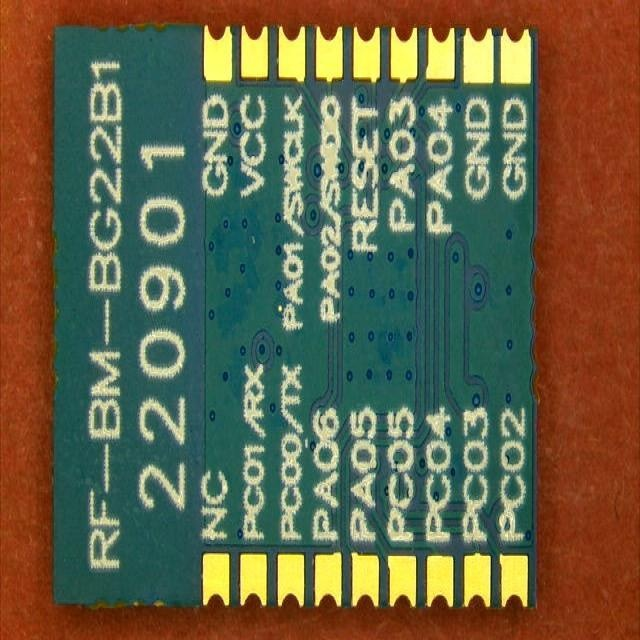

Displaying: ng12_jpg.rf.e4cad87fe2938cab79eca0e4f9b39ef5.jpg


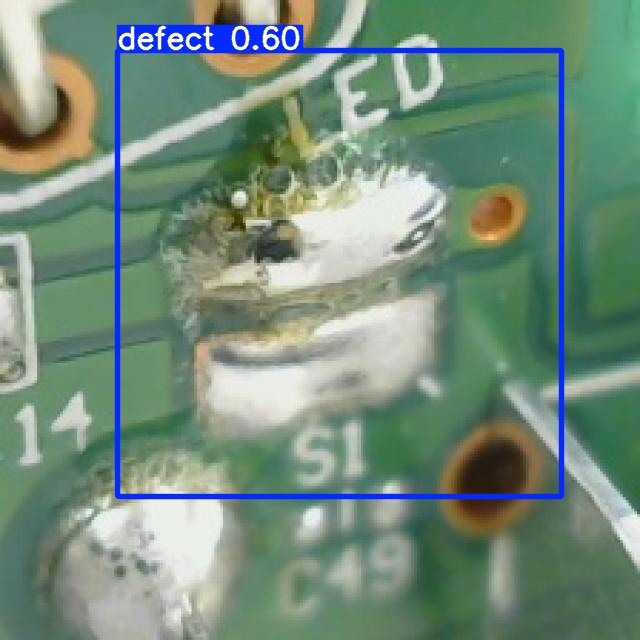

Displaying: ng13_jpg.rf.58f8a2f10afda1397fb4d1fd6ce0cc42.jpg


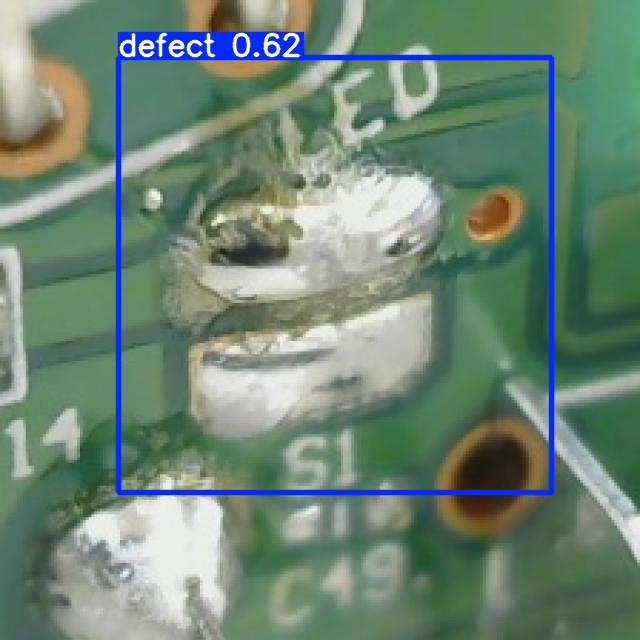

Displaying: ng29_jpg.rf.adacd6087fd4b0a838281f1bf6edf528.jpg


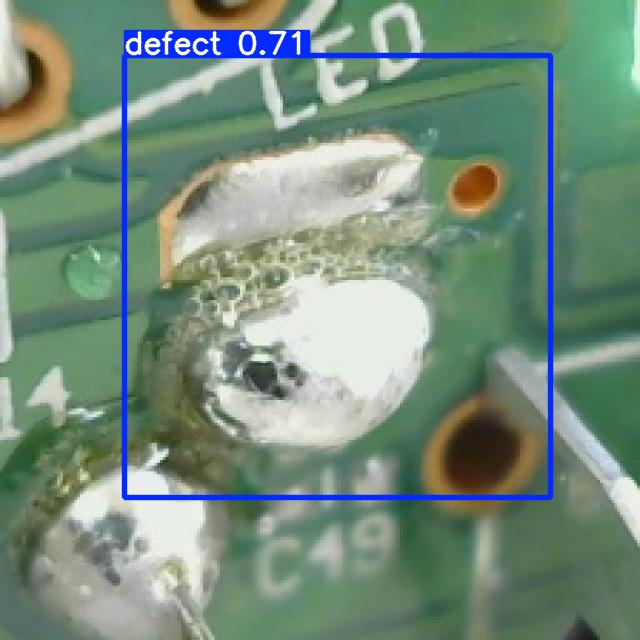

Displaying: ng6_jpg.rf.ebf7e1587980c6c08c23973d20525abf.jpg


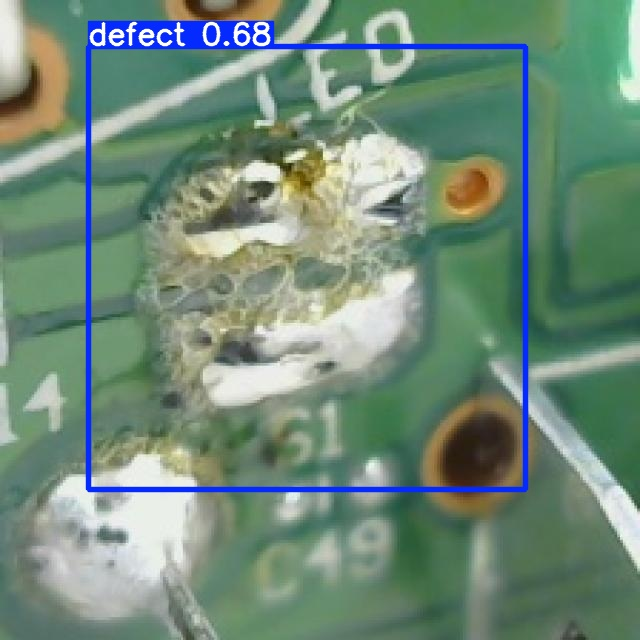

Displaying: ok8_jpg.rf.5e36fb3554d6abfa9c996653f3a85e2d.jpg


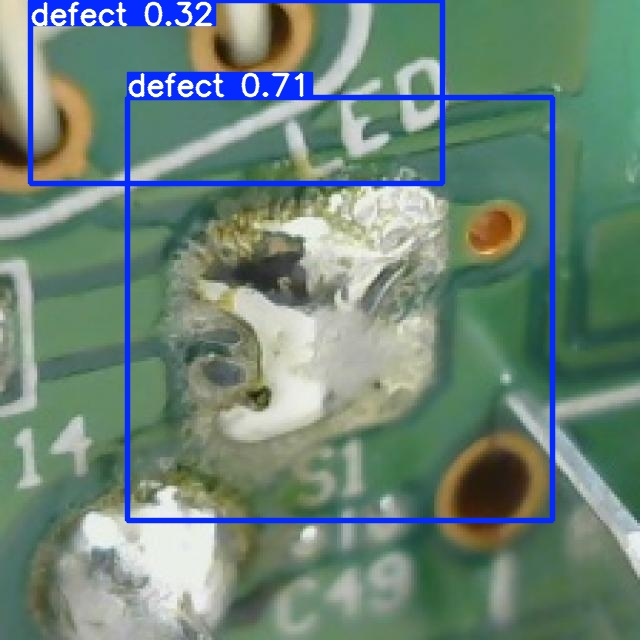

In [21]:
import os
from IPython.display import Image, display

output_dir = "/content/yolov5/runs/detect/exp5"
print("Detection Results:")
for img in sorted(os.listdir(output_dir)):
    if img.endswith(('.jpg', '.jpeg', '.png')):
        print(f"Displaying: {img}")
        display(Image(filename=os.path.join(output_dir, img), width=600))

#8. Analyze detection data and create visualizations

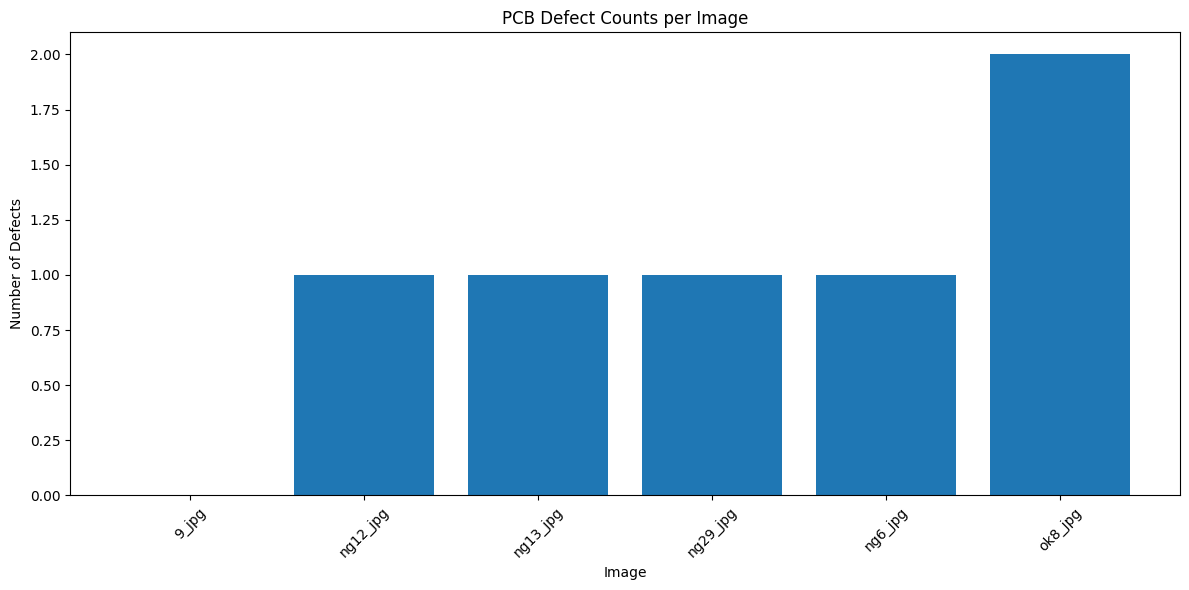

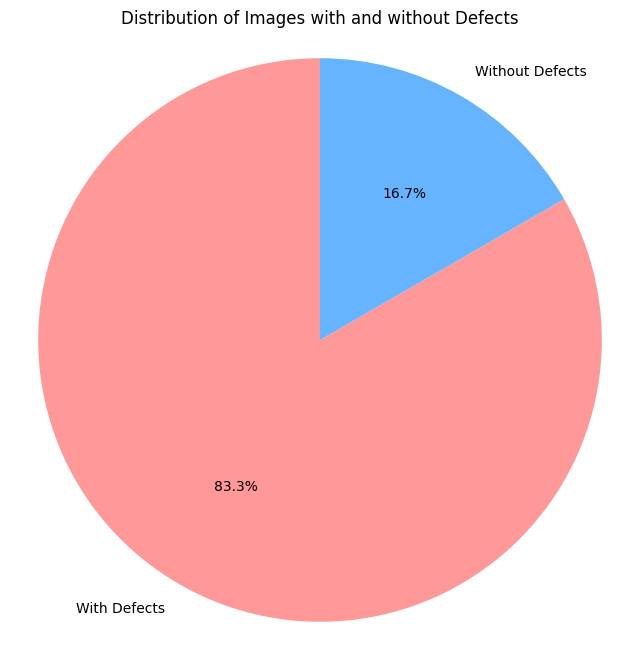

In [22]:
import matplotlib.pyplot as plt

detection_summary = {
    "9_jpg": "No detections", "ng12_jpg": "1 defect", "ng13_jpg": "1 defect",
    "ng29_jpg": "1 defect", "ng6_jpg": "1 defect", "ok8_jpg": "2 defects"
}

defect_counts = [0 if 'No detections' in result else int(result.split()[0]) for result in detection_summary.values()]
image_names = list(detection_summary.keys())

# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_names, defect_counts)
plt.title('PCB Defect Counts per Image')
plt.xlabel('Image')
plt.ylabel('Number of Defects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('defect_counts_bar_plot.png')
plt.show()

# Pie chart
images_with_defects = sum(1 for count in defect_counts if count > 0)
plt.figure(figsize=(8, 8))
plt.pie([images_with_defects, len(defect_counts) - images_with_defects],
        labels=['With Defects', 'Without Defects'],
        colors=['#ff9999', '#66b3ff'],
        autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')
plt.title('Distribution of Images with and without Defects')
plt.savefig('defect_distribution_pie_chart.png')
plt.show()

#9. Print statistics

In [23]:
total_defects = sum(defect_counts)
images_with_defects = sum(1 for count in defect_counts if count > 0)
print("\nDefect Detection Statistics:")
print(f"Total defects: {total_defects}")
print(f"Images with defects: {images_with_defects}")
print(f"Percentage of images with defects: {images_with_defects/len(defect_counts)*100:.2f}%")
print(f"Average defects per image: {total_defects/len(defect_counts):.2f}")


Defect Detection Statistics:
Total defects: 6
Images with defects: 5
Percentage of images with defects: 83.33%
Average defects per image: 1.00


#10. Video processing function

In [24]:
import cv2
import torch

def process_video(video_path, model_path):
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)
    cap = cv2.VideoCapture(video_path)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output_defect_detection.mp4', fourcc, fps, (width, height))

    frame_count = 0
    total_defects = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)

        rendered_frame = results.render()[0]

        # Count defects in this frame
        frame_defects = len(results.xyxy[0])
        total_defects += frame_defects

        # Add text with defect count to the frame
        cv2.putText(rendered_frame, f'Defects: {frame_defects}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        out.write(rendered_frame)
        frame_count += 1

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"\nVideo Processing Complete:")
    print(f"Processed {frame_count} frames")
    print(f"Total defects detected: {total_defects}")
    print(f"Average defects per frame: {total_defects/frame_count:.2f}")
    print(f"Output saved as 'output_defect_detection.mp4'")

# Usage example (uncomment to use):
# model_path = '/content/yolov5/runs/train/exp2/weights/best.pt'
# video_path = '/path/to/your/video.mp4'
# process_video(video_path, model_path)

#10. Conclusion and next steps

In [25]:
print("\nPCB Defect Detection Project Summary:")
print("1. Trained YOLOv5 model on PCB defect dataset")
print("2. Performed inference on test images")
print("3. Visualized results with bar plots and pie charts")
print("4. Calculated defect statistics")
print("5. Implemented video processing for real-time defect detection")
print("\nNext steps:")
print("- Fine-tune model for higher accuracy")
print("- Expand dataset with more diverse PCB images")
print("- Implement real-time defect detection system for production lines")
print("- Develop user interface for easy operation by quality control staff")


PCB Defect Detection Project Summary:
1. Trained YOLOv5 model on PCB defect dataset
2. Performed inference on test images
3. Visualized results with bar plots and pie charts
4. Calculated defect statistics
5. Implemented video processing for real-time defect detection

Next steps:
- Fine-tune model for higher accuracy
- Expand dataset with more diverse PCB images
- Implement real-time defect detection system for production lines
- Develop user interface for easy operation by quality control staff
